<a href="https://colab.research.google.com/github/RinaParikh/CNN/blob/master/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

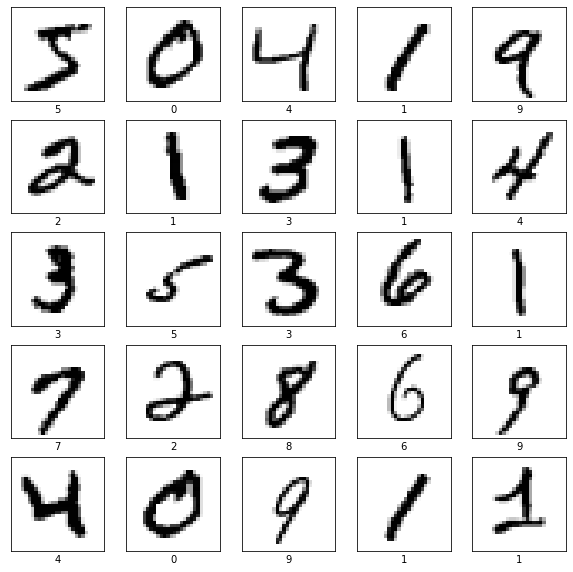

In [0]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# New Section

In [0]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 53,400
Trainable params: 53,400
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 54s 907us/sample - loss: 0.1552 - acc: 0.9506 - val_loss: 0.0559 - val_acc: 0.9828
Epoch 2/10
60000/60000 [==============================] - 55s 910us/sample - loss: 0.0485 - acc: 0.9850 - val_loss: 0.0482 - val_acc: 0.9836
Epoch 3/10
60000/60000 [==============================] - 55s 913us/sample - loss: 0.0345 - acc: 0.9891 - val_loss: 0.0323 - val_acc: 0.9897
Epoch 4/10
60000/60000 [==============================] - 55s 916us/sample - loss: 0.0262 - acc: 0.9916 - val_loss: 0.0280 - val_acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 54s 899us/sample - loss: 0.0212 - acc: 0.9934 - val_loss: 0.0319 - val_acc: 0.9905
Epoch 6/10
60000/60000 [==============================] - 54s 906us/sample - loss: 0.0170 - acc: 0.9944 - val_loss: 0.0340 - val_acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 54s 906us/sample - loss: 0.0133 - acc: 0.9958 

10000/10000 - 3s - loss: 0.0356 - acc: 0.9906


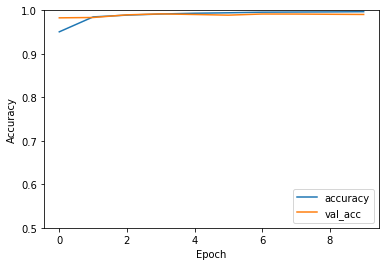

In [0]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [0]:
print(test_acc)

0.9906
